<a href="https://colab.research.google.com/github/LeslyVictoria2/CSST106-CS4B/blob/main/4B_VICTORIA_MP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSST106 - Perception and Computer Vision**
##**MACHINE PROBLEM 4**
###**Lesly-Ann B. Victoria from BSCS-4B**

#### **PACKAGES:**

In [1]:
#Unistall the current Package.
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84


In [2]:
#Install necessary development tools and dependencies required to build OpenCV from source.
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


In [3]:
#Clone the OpenCV repository from GitHub.
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 337349, done.
remote: Counting objects: 100% (576/576), done.
remote: Compressing objects: 100% (452/452), done.
remote: Total 337349 (delta 230), reused 307 (delta 100), pack-reused 336773 (from 1)
Receiving objects: 100% (337349/337349), 527.90 MiB | 21.37 MiB/s, done.
Resolving deltas: 100% (235348/235348), done.
Updating files: 100% (7566/7566), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41718, done.
remote: Counting objects: 100% (1468/1468), done.
remote: Compressing objects: 100% (1056/1056), done.
remote: Total 41718 (delta 558), reused 989 (delta 329), pack-reused 40250 (from 1)
Receiving objects: 100% (41718/41718), 150.26 MiB | 27.63 MiB/s, done.
Resolving deltas: 100% (25669/25669), done.


In [4]:
#Change directory to the cloned OpenCV directory.
%cd opencv
#Create a build directory for building the OpenCV source.
!mkdir build
#Move into the newly created build directory.
%cd build

#Run the CMake configuration for building OpenCV with specific options:
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..

#Compile OpenCV using 8 threads (parallel compilation) for faster build times.
!make -j8
#Install the compiled OpenCV library into the system.
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  8%] Linking CXX executable 

In [5]:
#Import Libraries.
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage.feature import hog
from skimage import exposure

#### **Task 1: Harris Corner Detection**

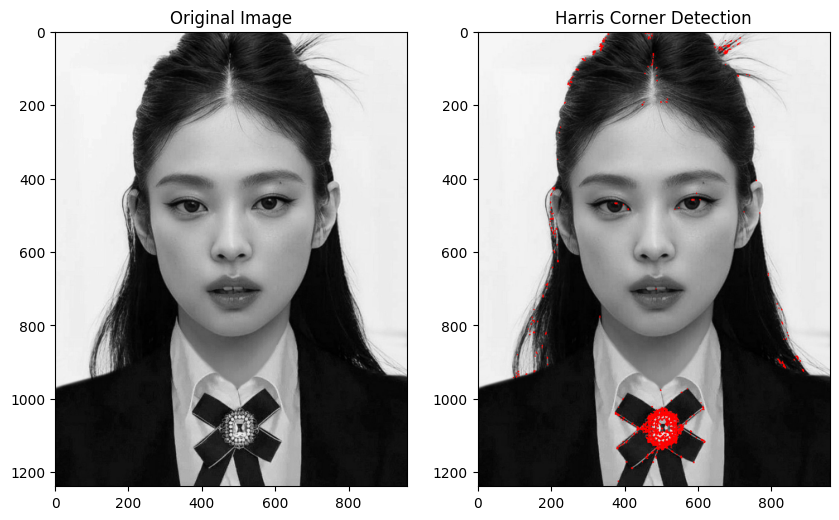

In [6]:
def harris_corner_detection(image_path):
    #Load the image in grayscale.
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #Convert to float32 for processing.
    img_float = np.float32(img)
    #Apply Harris Corner Detection.
    harris_corners = cv2.cornerHarris(img_float, blockSize=2, ksize=3, k=0.04)
    #Dilate the corner points to enhance them.
    harris_corners = cv2.dilate(harris_corners, None)
    #Create a color version of the grayscale image to display the red corner points.
    img_with_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    #Mark corners with red color.
    img_with_corners[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]
    #Display the original and corner-detected images side by side.
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(img_with_corners)
    plt.title('Harris Corner Detection')
    plt.show()

#Load the image.
image_path = '/content/drive/MyDrive/jennie.jpg'
harris_corner_detection(image_path)

#### **Task 2: HOG Feature Extraction**

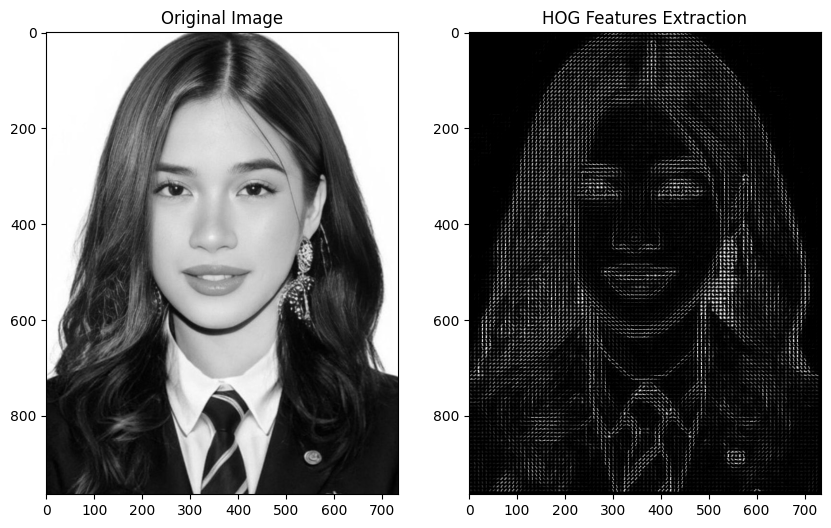

In [7]:
def hog_feature_extraction(image_path):
    #Load the image in grayscale.
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #Extract HOG features.
    hog_features, hog_image = hog(img,
                                  orientations=9,
                                  pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2),
                                  block_norm='L2-Hys',
                                  visualize=True)
    #Adjust the intensity of the HOG image for better visualization.
    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    #Display the original and HOG visualized images side by side.
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features Extraction')
    plt.show()

#Load the image.
image_path = '/content/drive/MyDrive/aiah.jpg'
hog_feature_extraction(image_path)

#### **Task 3: ORB Feature Extraction and Matching**

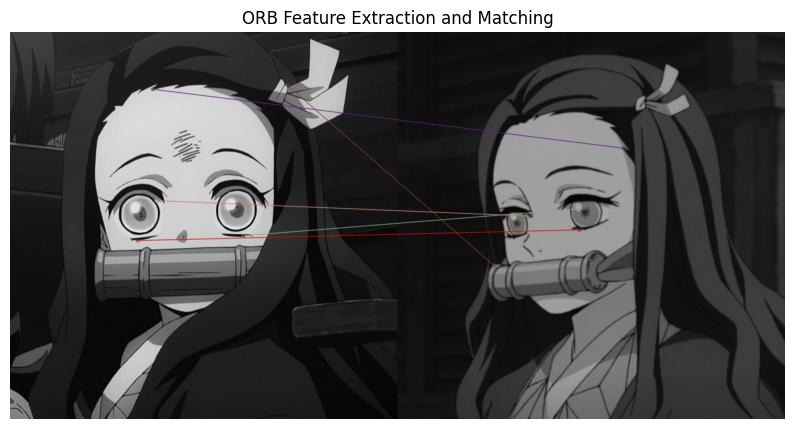

In [8]:
def orb_feature_matching(image_path1, image_path2):
    #Load the two images.
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)
    #Resize the images to the same size.
    height, width = img1.shape[:2]
    img2 = cv2.resize(img2, (width, height))
    #Initialize the ORB detector.
    orb = cv2.ORB_create()
    #Detect keypoints and compute descriptors for both images.
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)
    #Initialize FLANN-based matcher.
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    #Match descriptors using FLANN.
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)
    #Filter matches using the Lowe's ratio test.
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    #Draw matches.
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #Display the matching keypoints.
    plt.figure(figsize=(10, 6))
    plt.imshow(img_matches)
    plt.title("ORB Feature Extraction and Matching")
    plt.axis('off')
    plt.show()

#Load the Images.
image_path1 = '/content/drive/MyDrive/nezuko1.jpg'
image_path2 = '/content/drive/MyDrive/nezuko2.jpg'
orb_feature_matching(image_path1, image_path2)

#### **Task 4: SIFT and SURF Feature Extraction**

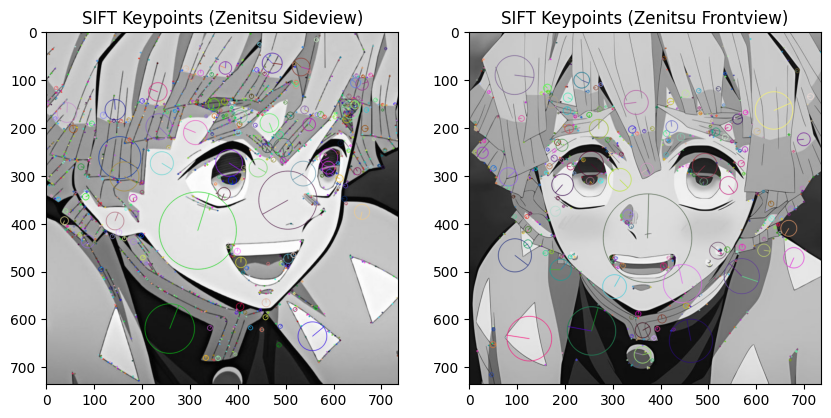

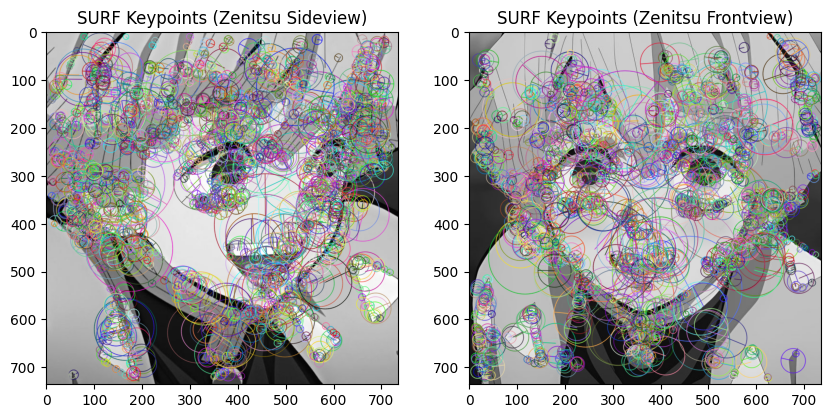

In [15]:
def sift_and_surf_feature_extraction(image_path1, image_path2):
    #Load the two images in grayscale.
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)
    #Resize the second image to match the size of the first.
    height, width = img1.shape[:2]
    img2 = cv2.resize(img2, (width, height))
    #SIFT Feature Extraction.
    sift = cv2.SIFT_create()
    keypoints1_sift, descriptors1_sift = sift.detectAndCompute(img1, None)
    keypoints2_sift, descriptors2_sift = sift.detectAndCompute(img2, None)
    #SURF Feature Extraction (requires xfeatures2d module).
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)
    keypoints1_surf, descriptors1_surf = surf.detectAndCompute(img1, None)
    keypoints2_surf, descriptors2_surf = surf.detectAndCompute(img2, None)
    #SIFT Keypoints.
    img1_sift = cv2.drawKeypoints(img1, keypoints1_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img2_sift = cv2.drawKeypoints(img2, keypoints2_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #SURF Keypoints.
    img1_surf = cv2.drawKeypoints(img1, keypoints1_surf, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img2_surf = cv2.drawKeypoints(img2, keypoints2_surf, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #Plot SIFT results.
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1_sift, cmap='gray')
    plt.title("SIFT Keypoints (Zenitsu Sideview)")
    plt.subplot(1, 2, 2)
    plt.imshow(img2_sift, cmap='gray')
    plt.title("SIFT Keypoints (Zenitsu Frontview)")
    plt.show()

    #Plot SURF results.
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img1_surf, cmap='gray')
    plt.title("SURF Keypoints (Zenitsu Sideview)")
    plt.subplot(1, 2, 2)
    plt.imshow(img2_surf, cmap='gray')
    plt.title("SURF Keypoints (Zenitsu Frontview)")
    plt.show()

#Load the Images.
image_path1 = '/content/drive/MyDrive/zenitsu1.jpg'
image_path2 = '/content/drive/MyDrive/zenitsu2.jpg'
sift_and_surf_feature_extraction(image_path1, image_path2)

#### **Task 5: Feature Matching using Brute-Force Matcher**

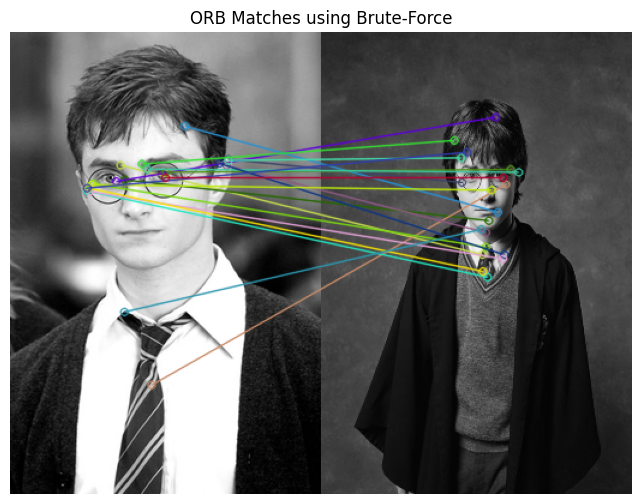

In [18]:
def brute_force_feature_matching(image_path1, image_path2):
    #Load the two images in grayscale.
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)
    #Resize the second image to match the size of the first.
    height, width = img1.shape[:2]
    img2 = cv2.resize(img2, (width, height))
    #Initialize the ORB detector.
    orb = cv2.ORB_create()
    #Detect keypoints and compute descriptors for both images.
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)
    #Initialize Brute-Force Matcher with Hamming distance (suitable for ORB).
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    #Match descriptors.
    matches = bf.match(descriptors1, descriptors2)
    #Sort matches based on distance (best matches first).
    matches = sorted(matches, key=lambda x: x.distance)
    #Draw matches.
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #Display the matching keypoints.
    plt.figure(figsize=(10, 6))
    plt.imshow(img_matches)
    plt.title("ORB Matches using Brute-Force")
    plt.axis('off')
    plt.show()

#Load the Images.
image_path1 = '/content/drive/MyDrive/HarryPotter1.jpg'
image_path2 = '/content/drive/MyDrive/HarryPotter2.jpg'
brute_force_feature_matching(image_path1, image_path2)

#### **Task 6: Image Segmentation using Watershed Algorithm**

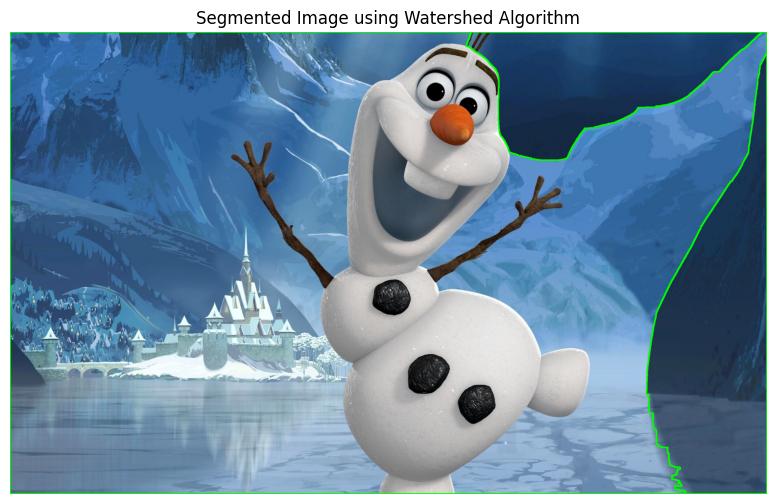

In [30]:
def watershed_segmentation(image_path):
    img = cv2.imread(image_path)
    #Convert the image to grayscale.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Apply thresholding to separate foreground and background.
    ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    #Remove noise using morphological operations (opening).
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    #Identify sure background area using dilation.
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    #Identify sure foreground area using distance transform and thresholding.
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    #Identify unknown region (where foreground and background are unclear).
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    #Label markers for watershed.
    ret, markers = cv2.connectedComponents(sure_fg)
    #Add one to all labels so that sure background is not zero, but 1.
    markers = markers + 1
    #Mark the unknown region as zero.
    markers[unknown == 255] = 0
    #Apply the Watershed algorithm.
    markers = cv2.watershed(img, markers)
    #Mark boundaries with a thicker line by dilating the boundary mask.
    img[markers == -1] = [0, 255, 0]
    boundary_mask = np.uint8(markers == -1) * 255
    thick_boundary = cv2.dilate(boundary_mask, kernel, iterations=2)
    #Apply the thickened boundary mask to the original image.
    img[thick_boundary == 255] = [0, 255, 0]
    #Display the segmented image.
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Image using Watershed Algorithm")
    plt.axis('off')
    plt.show()

#Load the Image.
image_path = '/content/drive/MyDrive/olaf.jpg'
watershed_segmentation(image_path)